# Markov-Decision-Process

## Terms Definition

todo this part lastly

## MDP Gridworld

First thing - import libraries.

In [2]:
from IPython.display import Image
import pickle
from MDP.World import World
from MDP.mdp import TransitionModel, RewardFunction, MDP

### Transition Model & Reward Function

For constructing the transition model I was needed to compute
4 different matrices, one for each action. For each action I computed the probability
for moving from $s$ state to $s'$ state using the action. Then I construct this as a matrix where
the rows represent the 'from' state and the columns represent the 'to'. For example the probability
in cell $(3,4)$ represent the probability to move from state $3$ to state $4$ using the action.

*Note*: I treated the obstacle as extended state, i.e., the state is not reachable at all.
Hence, it not part of the transition model and reward function.

I'm not sure if it is needed but I show the probability matrix I got for each action. I saved them as pickle files
so I first load them and then print each matrix with the corresponding action:

In [3]:
actions = ['north', 'east', 'south', 'west']
matrices = []
for a in actions:

    path = 'transition_model/{}.pkl'.format(a)
    matrices.append(pickle.load(open(path, 'rb')))
    print('\nAction = {} \n{}'.format(a.capitalize(), matrices[-1]))


Action = North 
     1    2    3    4    5    6    7    8    9    10   11   12   13   14   16
1   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2   0.8  0.1  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   0.0  0.8  0.1  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   0.0  0.0  0.8  0.1  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5   0.1  0.0  0.0  0.0  0.8  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0
6   0.0  0.1  0.0  0.0  0.8  0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0
7   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8   0.0  0.0  0.0  0.1  0.0  0.0  0.8  0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.0
9   0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.8  0.0  0.0  0.0  0.1  0.0  0.0
10  0.0  0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.8  0.0  0.0  0.0  0.0  0.1  0.0
11  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.8  0.1  0.0  0.0  0.0  0.0
12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.0

Now to make it easier for use I created a class names `TransitionModel` which wrap all the above-mentioned
matrices. The constructor of the class gets list of actions and list of probability matrices (as pandas DataFrames).
Then I implemented the method `prob` which computes the probability $p(s'|s,a)$. For example:

In [4]:
transition_model = TransitionModel(actions = [a[0] for a in actions],
                                   transition_matrices=matrices)

print('P(s` = 1 | s = 5, a = N) = {}'.format(transition_model.prob(1, 5, 0)))

P(s` = 1 | s = 5, a = N) = 0.1


Now for the reward function.
In each transition from $s$ to $s'$ the robots get reward of $-0.04$. In transition
to the goal state or to a hole the robot gets **in addition** a reward of
$+1$ or $-1$ corresponded. I construct a reward function for each action, where
$r(s, a, s')$ will be great than zero only if it possible to move from $s$ to $s'$ using
$a$.

In [ ]:
actions = ['north', 'east', 'south', 'west']
matrices = []
for a in actions:

    path = 'reward_function/{}.pkl'.format(a)
    matrices.append(pickle.load(open(path, 'rb')))
    print('\nAction = {} \n{}'.format(a.capitalize(), matrices[-1]))


I implemented a class names `RewardFunction` which represent a reward function. The constructor
gets a list of actions and list of reward matrix for each action. Then I implements a method
to get easily the reward $r(s, a, s')$ by using the method `reward()` which get ($s, a, s'$) and returns
the corresponded reward. For the avoidance of doubt here too I will print out all the matrices I got:


In [10]:
reward_function = RewardFunction(actions = [a[0] for a in actions],
                                 reward_matrices=matrices)

print('r(s = 2, a = N, s` = 1) = {}'.format(reward_function.reward(2, 0, 1)))

r(s = 2, a = N, s` = 1) = -1.04


And now for the graphical model when action is 'North':

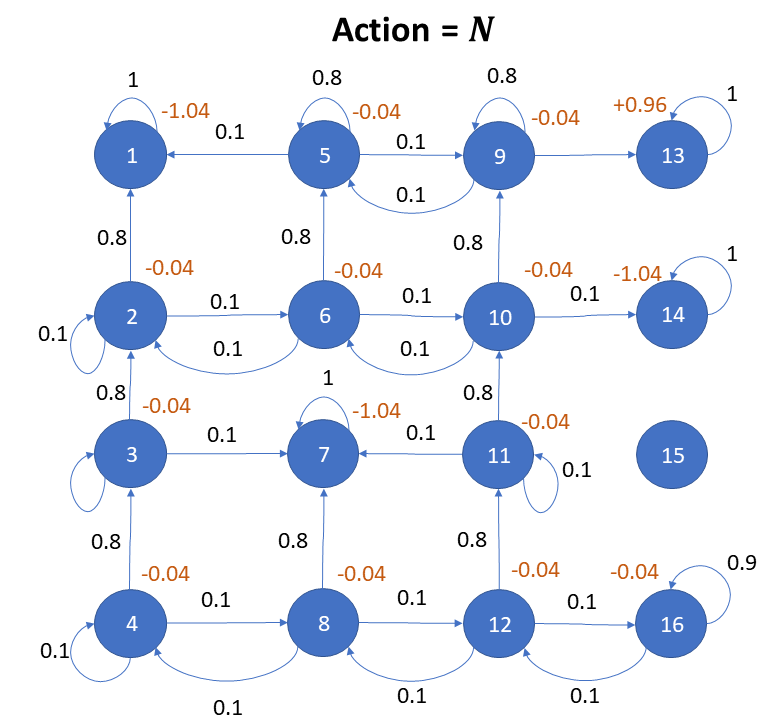

In [8]:
Image(filename='transition_model/MDP_north.png')

### Value Iteration I

In order to solve the MDP using value iteration algorithm I implemented a method called `value_iteration`
which get as input a threshold input $\theta$ and returns a policy $\pi$.
I used $\theta = 10^{-4}$ as threshold and $\gamma = 0.99$ as discount factor.

Now let's create a MDP instance and solve it while using the value iteration algorithm.

In [ ]:
# Create a MDP instance
mdp = MDP(World(), transition_model, reward_function, gamma=0.99)

# Solve it using value iteration algorithm
mdp.value_iteration(theta=10 ** -4, verbose=True)

And now let's plot the results.

### Value Iteration II

### Policy Iteration